# Problem 1: MixUp Cats and Dogs

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS) / 'images'

In [4]:
def is_cat(x):
    return x[0].isupper()

In [5]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224),
    num_workers=0
)

## Without data augmentation

In [6]:
learn = cnn_learner(dls, resnet18, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, error_rate])
learn.fine_tune(20)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.161101,0.048100,0.985115,0.014885,01:04


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.048937,0.026391,0.991204,0.008796,01:09
1,0.021794,0.022398,0.991881,0.008119,01:10
2,0.024748,0.034776,0.991204,0.008796,01:10
3,0.034770,0.040764,0.991204,0.008796,01:09
4,0.023144,0.033292,0.989851,0.010149,01:10
5,0.022587,0.017930,0.995264,0.004736,01:10
6,0.015275,0.015798,0.994587,0.005413,01:09
7,0.019700,0.033088,0.993234,0.006766,01:09
8,0.017247,0.022652,0.993911,0.006089,01:09
9,0.017587,0.011119,0.993234,0.006766,01:09


## MixUp

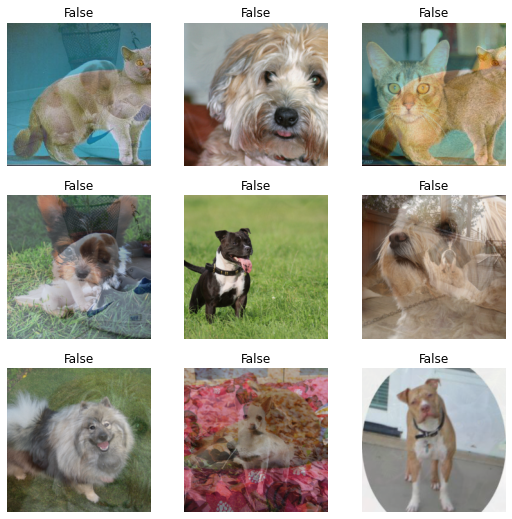

In [ ]:
mixup = MixUp(1.)
with Learner(dls, nn.Linear(3,4), loss_func=CrossEntropyLossFlat(), cbs=mixup) as learn:
    learn.epoch, learn.training = 0, True
    learn.dl = dls.train
    b = dls.one_batch()
    learn._split(b)
    learn('before_train')
    learn('before_batch')

_, axs = plt.subplots(3,3, figsize=(9,9))
dls.show_batch(b=(mixup.x,mixup.y), ctxs=axs.flatten())

In [ ]:
learn = cnn_learner(dls, resnet18, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, error_rate])
learn.fine_tune(20, cbs=mixup)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.639743,0.100819,0.972260,0.027740,01:01


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.469755,0.076053,0.987145,0.012855,01:06
1,0.411813,0.087062,0.986468,0.013532,01:08
2,0.400826,0.062943,0.990528,0.009472,01:07
3,0.373744,0.070378,0.990528,0.009472,01:07
4,0.356739,0.061315,0.993911,0.006089,01:07
5,0.347647,0.062915,0.995264,0.004736,01:07
6,0.336614,0.083420,0.992558,0.007442,01:07
7,0.326879,0.066479,0.993911,0.006089,01:07
8,0.331208,0.059266,0.993911,0.006089,01:07
9,0.324427,0.064982,0.989851,0.010149,01:07


## CutMix

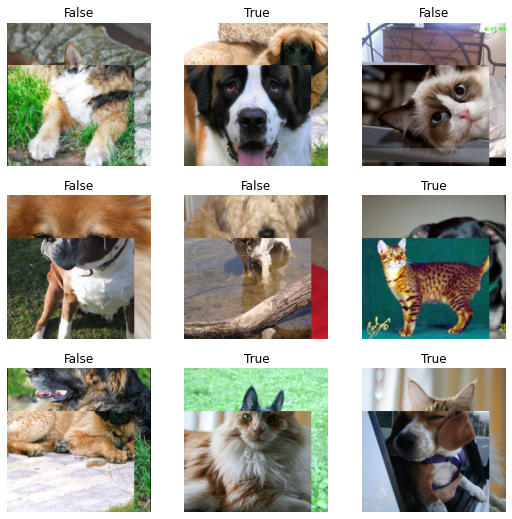

In [ ]:
cutmix = CutMix(1.)
with Learner(dls, nn.Linear(3,4), loss_func=CrossEntropyLossFlat(), cbs=cutmix) as learn:
    learn.epoch,learn.training = 0,True
    learn.dl = dls.train
    b = dls.one_batch()
    learn._split(b)
    learn('before_train')
    learn('before_batch')

_,axs = plt.subplots(3,3, figsize=(9,9))
dls.show_batch(b=(cutmix.x,cutmix.y), ctxs=axs.flatten())

In [ ]:
learn = cnn_learner(dls, resnet18, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, error_rate])
learn.fine_tune(20, cbs=cutmix)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.732970,0.124808,0.966847,0.033153,01:02


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.518820,0.096847,0.976996,0.023004,01:09
1,0.483124,0.086286,0.983085,0.016915,01:08
2,0.463563,0.103260,0.985792,0.014208,01:08
3,0.405254,0.087846,0.986468,0.013532,01:08
4,0.385363,0.090968,0.985115,0.014885,01:08
5,0.363279,0.093013,0.989851,0.010149,01:07
6,0.352891,0.069227,0.995940,0.004060,01:07
7,0.349818,0.086190,0.993911,0.006089,01:07
8,0.349431,0.095214,0.992558,0.007442,01:07
9,0.331298,0.092884,0.988498,0.011502,01:07


## Interpretation of the results

- The value of the loss function of the model that uses resnet18 architecture without any data augmentation techniques converges after about 10 epochs.
- After 10-12 epochs, we have no improvement for models with data augmentation, because these data augmentation techniques require a greater number of epochs till convergence.